
Logistic Regression
  Test accuracy: 0.667
              precision    recall  f1-score   support

         0.0       0.50      0.67      0.57         6
         1.0       0.50      0.33      0.40         6
         2.0       1.00      0.83      0.91         6
         3.0       0.62      0.83      0.71         6
         4.0       0.80      0.67      0.73         6

    accuracy                           0.67        30
   macro avg       0.68      0.67      0.66        30
weighted avg       0.69      0.67      0.66        30


Random Forest
  Test accuracy: 0.800
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83         6
         1.0       0.80      0.67      0.73         6
         2.0       0.80      0.67      0.73         6
         3.0       0.62      0.83      0.71         6
         4.0       1.00      1.00      1.00         6

    accuracy                           0.80        30
   macro avg       0.81      0.80      0.80      

/var/folders/_k/7gb911zx6tnfp1fvl5kc1p500000gn/T/ipykernel_2637/1728170284.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accs, y=names, palette='viridis')


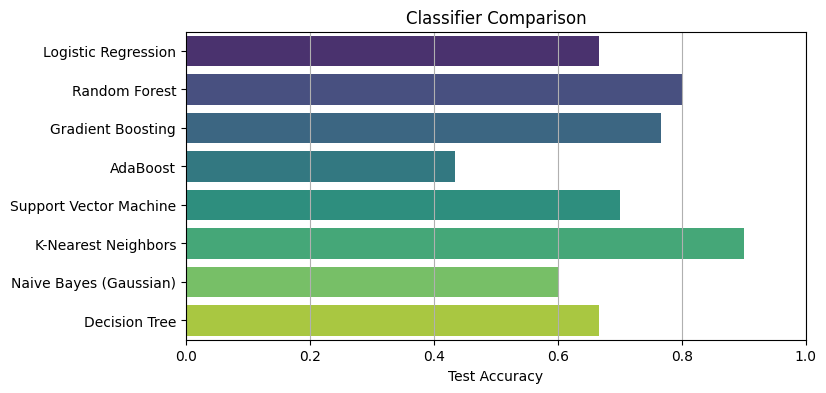

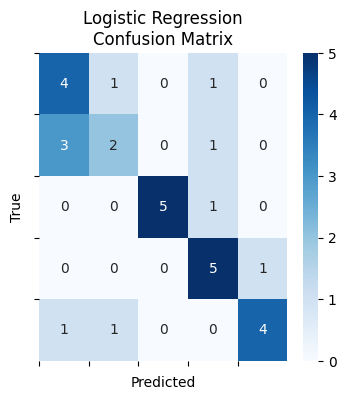

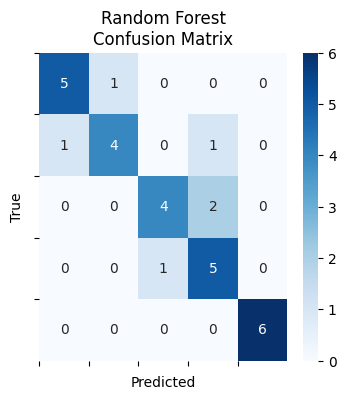

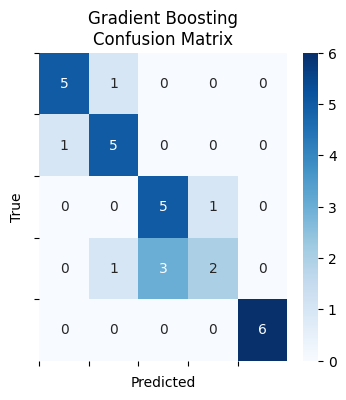

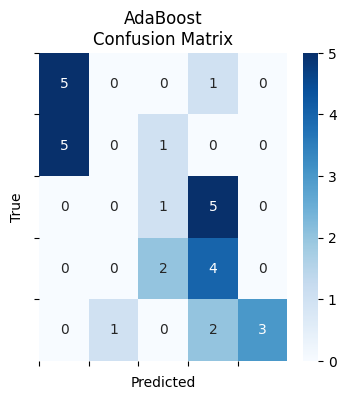

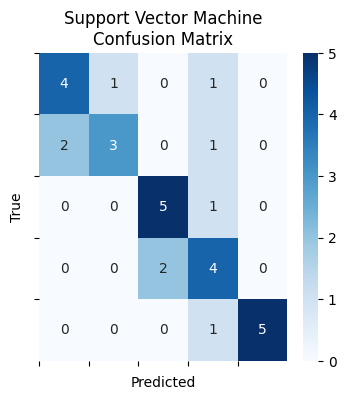

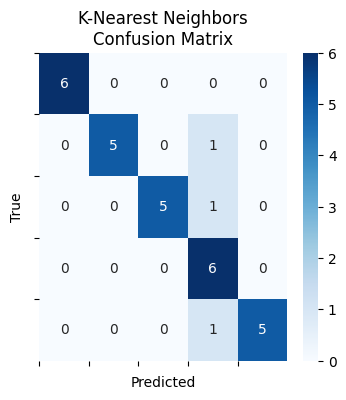

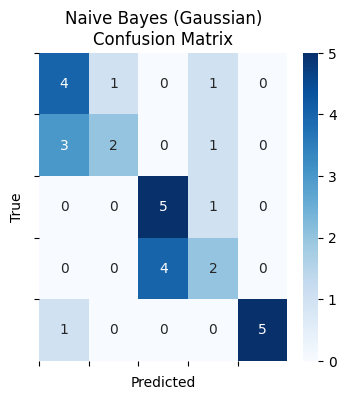

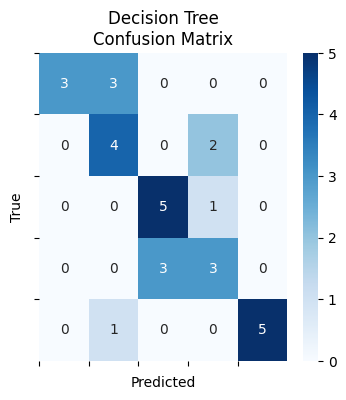

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection    import train_test_split
from sklearn.preprocessing      import StandardScaler
from sklearn.linear_model       import LogisticRegression
from sklearn.ensemble           import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.svm                import SVC
from sklearn.naive_bayes        import GaussianNB
from sklearn.tree               import DecisionTreeClassifier
from sklearn.metrics            import accuracy_score, confusion_matrix, classification_report

# 1) Load data
df = pd.read_csv('final_dataset.csv')
X = df.drop('label', axis=1).values
y = df['label'].values

# 2) Split 80/20 stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Scale features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 4) Define a suite of classifiers
models = {
    'Logistic Regression'    : LogisticRegression(max_iter=200, random_state=42),
    'Random Forest'          : RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting'      : GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'AdaBoost'               : AdaBoostClassifier(n_estimators=50, random_state=42),
    'Support Vector Machine' : SVC(kernel='rbf', C=1.0, probability=True, random_state=42),
    'K-Nearest Neighbors'    : KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes (Gaussian)' : GaussianNB(),
    'Decision Tree'          : DecisionTreeClassifier(max_depth=5, random_state=42),
}

results = {}

# 5) Train & evaluate each
for name, clf in models.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {
        'accuracy': acc,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'report': classification_report(y_test, y_pred, output_dict=True)
    }
    print(f"\n{name}\n  Test accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred))

# 6) Plot overall accuracies
plt.figure(figsize=(8,4))
names = list(results.keys())
accs  = [results[n]['accuracy'] for n in names]
sns.barplot(x=accs, y=names, palette='viridis')
plt.xlim(0,1)
plt.xlabel('Test Accuracy')
plt.title('Classifier Comparison')
plt.grid(axis='x')
plt.show()

# 7) Plot confusion matrices
for name in names:
    cm = results[name]['confusion_matrix']
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name}\nConfusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(np.arange(5))
    plt.yticks(np.arange(5))
    plt.show()
